<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%EA%B2%B0%EC%A0%95%EA%B2%BD%EA%B3%84%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
[0.] [[0.912 0.088]]
[0.] [[0.855 0.145]]
[0.] [[0.766 0.234]]
[0.] [[0.638 0.362]]
[1.] [[0.481 0.519]]


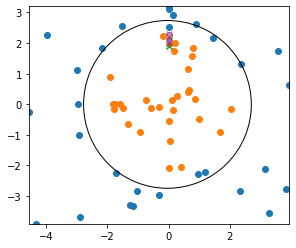

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

li1 = [] # 결정경계 바깥쪽 데이터
li2 = [] # 결정경계 안쪽 데이터

while True :
  x = np.random.randint(-5, 5) * np.random.rand() # -5 ~ 5 사이의 실수 랜덤값 (x축)
  y = np.random.randint(-5, 5) * np.random.rand() # -5 ~ 5 사이의 실수 랜덤값 (y축)

  # 원의방정식(일반형) x, y의 계수 / 2 * -1  === 원의 중점
  # 원의 반지름 -> 상수값(절대값) 제곱근
  if len(li1) < 30 :
    if x ** 2 + y ** 2 > 5 : # 원 바깥쪽
      li1.append([x, y])

  if len(li2) < 30 :
    if x ** 2 + y ** 2 < 5 : # 원 안쪽
      li2.append([x, y])

  if len(li1) == 30 and len(li2) == 30 : # 각각 데이터 30개씩 마련
    break

# ndArray로 변환
data1 = np.array(li1)
data2 = np.array(li2)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

# 학습데이터
data = np.concatenate((data1, data2), axis=0)

# 타겟데이터
target1 = np.ones((30, 1))
target2 = np.zeros((30, 1))

target = np.concatenate((target1, target2), axis=0)
target = target.reshape(-1)

# 학습, 테스트 데이터 분리
trd, tsd, trt, tst = train_test_split(data, target, random_state=10)

# 원 모양의 결정경계를 그리기 위해 차수 올림
poly = PolynomialFeatures(include_bias=False)

poly.fit(trd, trt)
print(poly.get_feature_names_out())

trd_p = poly.transform(trd)
tsd_p = poly.transform(tsd)


# 로지스틱회귀 학습
lr = LogisticRegression()

lr.fit(trd_p, trt)
lr.score(trd_p, trt), lr.score(tsd_p, tst)

# 각 파라미터에 대한 계수(기울기)
lr.coef_, lr.intercept_


0.08 * x + 0.01 * y + 1.17 * x ** 2 + 1.43 * y ** 2

# 원의 중점 구하기
ox = 0.08 / 2 * -1
oy = 0.01 / 2 * -1

# 반지름 구하기
r = 7.52
r = np.sqrt(r)

# 원 그래프 그리기
circle = plt.Circle((ox, oy), r, fill=False)
a = plt.axes(xlim=(np.min(data1[:, 0]), np.max(data1[:, 0])), ylim=(np.min(data1[:, 1]), np.max(data1[:, 1])))
a.add_patch(circle)
a.set_aspect('equal')

# 데이터 산점도
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])

test1 = [[0,1.9]]
test2 = [[0,2]]
test3 = [[0,2.1]]
test4 = [[0,2.2]]
test5 = [[0,2.3]]

test1_p = poly.transform(test1)
test2_p = poly.transform(test2)
test3_p = poly.transform(test3)
test4_p = poly.transform(test4)
test5_p = poly.transform(test5)

print(lr.predict(test1_p), np.round(lr.predict_proba(test1_p), decimals=3)) 
print(lr.predict(test2_p), np.round(lr.predict_proba(test2_p), decimals=3)) 
print(lr.predict(test3_p), np.round(lr.predict_proba(test3_p), decimals=3)) 
print(lr.predict(test4_p), np.round(lr.predict_proba(test4_p), decimals=3)) 
print(lr.predict(test5_p), np.round(lr.predict_proba(test5_p), decimals=3)) 

plt.scatter(0, 1.9, marker='x')
plt.scatter(0, 2, marker='x')
plt.scatter(0, 2.1, marker='x')
plt.scatter(0, 2.2, marker='x')
plt.scatter(0, 2.3, marker='x')

In [ ]:
ㅈ